In [2]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

Load temperature data

In [123]:
temp=pd.read_csv('GlobalLandTemperaturesByCountry.csv')

In [4]:
temp.info()
temp.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             577462 non-null  object 
 1   AverageTemperature             544811 non-null  float64
 2   AverageTemperatureUncertainty  545550 non-null  float64
 3   Country                        577462 non-null  object 
dtypes: float64(2), object(2)
memory usage: 17.6+ MB


,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


Temperatures are floats in degrees Celcius. Date column is an object which needs to be converted to a date time. There are several thousand null values in the temperature fields. The data also goes back to the 1700's, which is farther back than we really need.

We will convert the date column to a date, convert the average temperature to Fahrenheit, drop null values, and retain only observations after 1900.

In [124]:
#Covert date column to datetime
temp['Date']=temp['dt'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577462 entries, 0 to 577461
Data columns (total 5 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   dt                             577462 non-null  object        
 1   AverageTemperature             544811 non-null  float64       
 2   AverageTemperatureUncertainty  545550 non-null  float64       
 3   Country                        577462 non-null  object        
 4   Date                           577462 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 22.0+ MB


In [125]:
#1900 to date
temp=temp[temp['Date']>='1900-01-01']
temp.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Date
1874,1900-01-01,-3.026,0.538,Åland,1900-01-01
1875,1900-02-01,-8.063,0.657,Åland,1900-02-01
1876,1900-03-01,-3.196,0.467,Åland,1900-03-01
1877,1900-04-01,0.781,0.224,Åland,1900-04-01
1878,1900-05-01,4.960,0.503,Åland,1900-05-01


In [134]:
temp['AverageTemperature'].isnull().sum()


1050

Now about 1000 missing temperature values. We will investigate those missing values.

In [136]:
#Display some of the observations with missing temperature values
temp[temp['AverageTemperature'].isnull()]


,dt,AverageTemperature,AverageTemperatureUncertainty,Country,Date
3238,2013-09-01,NaN,NaN,Åland,2013-09-01
5344,2013-09-01,NaN,NaN,Afghanistan,2013-09-01
7309,2013-09-01,NaN,NaN,Africa,2013-09-01
10548,2013-09-01,NaN,NaN,Albania,2013-09-01
13269,2013-09-01,NaN,NaN,Algeria,2013-09-01
...,...,...,...,...,...
566880,2013-09-01,NaN,NaN,Vietnam,2013-09-01
571878,2013-09-01,NaN,NaN,Western Sahara,2013-09-01
573531,2013-09-01,NaN,NaN,Yemen,2013-09-01
575496,2013-09-01,NaN,NaN,Zambia,2013-09-01


Each of these observations is dated 9/1/2013. What is the most recent set of observation dates?

In [137]:
max(temp['Date'])

Timestamp('2013-09-01 00:00:00')

Are there other dates missing values?

In [151]:
temp[temp['AverageTemperature'].isnull()].groupby('Date').count()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
Date,,,,
1900-01-01,2,0,0,2
1900-02-01,2,0,0,2
1900-03-01,2,0,0,2
1900-04-01,2,0,0,2
1900-05-01,2,0,0,2
...,...,...,...,...
2013-05-01,1,0,1,1
2013-06-01,1,0,1,1
2013-07-01,1,0,1,1


222 of 243 of the observations for 9/1/2013 contain missing temperature values. This could indicate incomplete data for 9/1/2013. Due to the high rate of missing values for 9/1/2013 and it being the last date in the data set, we will drop observations related to September 2013.

In [157]:
temp=temp[temp['Date']!='2013-09-01']
temp['AverageTemperature'].isnull().sum()

828

We still have 828 other missing values. Are these missing data common in certain countries?

In [158]:
temp[temp['AverageTemperature'].isnull()].groupby('Country').count()

,dt,AverageTemperature,AverageTemperatureUncertainty,Date
Country,,,,
Antarctica,763,0,739,763
Federated States Of Micronesia,30,0,0,30
French Polynesia,6,0,0,6
French Southern And Antarctic Lands,4,0,0,4
Heard Island And Mcdonald Islands,4,0,0,4
Palau,20,0,0,20
South Georgia And The South Sandwich Isla,1,0,0,1


Antarctica is the source of the majority of the missing temperature values. The continent of Antarctica is not a country we are concerned with determining the climate and will be dropped. The other missing values are concentrated to a handful of small, mostly island nations.
Let's look more closely at the missing data to determine if there is a pattern.

In [189]:
temp[(temp['Country']=='French Southern And Antarctic Lands') & (temp['AverageTemperature'].isnull())]
#French Southern And Antarctic Lands is missing the first 2 months of observations recorded for it and then two in a row the following year.
#Backfill or drop

temp[(temp['Country']=='Federated States Of Micronesia') & (temp['AverageTemperature'].isnull())]
#Federated States Of Micronesia is missing the first 2 full years of observations and then a string of 7 months in a row.
#Drop these

temp[(temp['Country']=='French Polynesia') & (temp['AverageTemperature'].isnull())]
#French Polynesia is missing the first 4 observations and then 2 other nonconsecutive
#Fill or drop

temp[(temp['Country']=='Heard Island And Mcdonald Islands') & (temp['AverageTemperature'].isnull())]
#Similar to the French Southern Lands, Heard Island And Mcdonald Islands is missing the first 2 months and then 2 more next year

temp[(temp['Country']=='Palau') & (temp['AverageTemperature'].isnull())]
#Palau is missing almost all the observations in the first 2 years.
#Drop these

temp[(temp['Country']=='South Georgia And The South Sandwich Isla') & (temp['AverageTemperature'].isnull())]['Date'].min()
#South Georgia And The South Sandwich Isla is missing it's first observation
#Drop or backfill

Timestamp('1902-12-01 00:00:00')

For simplicity, let's drop all missing values

In [190]:
#drop Na's
temp.dropna(inplace=True)
temp.drop(columns='dt', inplace=True)
temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328797 entries, 1874 to 577460
Data columns (total 4 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   AverageTemperature             328797 non-null  float64       
 1   AverageTemperatureUncertainty  328797 non-null  float64       
 2   Country                        328797 non-null  object        
 3   Date                           328797 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 12.5+ MB


Now we'll convert the temperature to fahrenheit

In [191]:
#Convert temperature to fahrenheit
temp['Avg Temp Fahrenheit']=temp['AverageTemperature'].apply(lambda x: (x*1.8)+32)
temp.head()

,AverageTemperature,AverageTemperatureUncertainty,Country,Date,Avg Temp Fahrenheit
1874,-3.026,0.538,Åland,1900-01-01,26.5532
1875,-8.063,0.657,Åland,1900-02-01,17.4866
1876,-3.196,0.467,Åland,1900-03-01,26.2472
1877,0.781,0.224,Åland,1900-04-01,33.4058
1878,4.960,0.503,Åland,1900-05-01,40.9280


In [192]:
#Calculate average temp for each country
country_temps=temp.groupby('Country')['Avg Temp Fahrenheit'].mean()
country_temps
print(country_temps.nlargest(10))
print(country_temps.nsmallest(10))

Country
Djibouti                83.986774
Mali                    83.514618
Burkina Faso            82.917629
Senegal                 82.634104
Aruba                   82.618064
United Arab Emirates    82.177783
Mauritania              82.016101
Gambia                  81.858790
Niger                   81.703632
Curaçao                 81.598401
Name: Avg Temp Fahrenheit, dtype: float64
Country
Greenland                                    -0.734238
Denmark                                       0.221670
Svalbard And Jan Mayen                       19.265252
Russia                                       22.698298
Canada                                       23.444835
Mongolia                                     31.074110
Norway                                       32.842550
South Georgia And The South Sandwich Isla    34.581059
Finland                                      35.003499
Iceland                                      35.197170
Name: Avg Temp Fahrenheit, dtype: float64


In [193]:
country_temps[country_temps<=40].nlargest(15)

Country
Tajikistan                                   39.685596
Kyrgyzstan                                   38.281566
Sweden                                       36.971802
Heard Island And Mcdonald Islands            36.611807
North America                                36.391026
Iceland                                      35.197170
Finland                                      35.003499
South Georgia And The South Sandwich Isla    34.581059
Norway                                       32.842550
Mongolia                                     31.074110
Canada                                       23.444835
Russia                                       22.698298
Svalbard And Jan Mayen                       19.265252
Denmark                                       0.221670
Greenland                                    -0.734238
Name: Avg Temp Fahrenheit, dtype: float64

Will need to remove Continents
Some European countries have multiple entries. Maybe european and colonial areas?

In [194]:
country_temps[country_temps.index.str.contains(r'\(Europe\)')]

Country
Denmark (Europe)           46.677595
France (Europe)            51.243013
Netherlands (Europe)       48.958491
United Kingdom (Europe)    48.078194
Name: Avg Temp Fahrenheit, dtype: float64

In [195]:
country_temps[country_temps.index.isin(['North America', 'South America', 'Africa', 'Europe', 'Asia','Antarctica', 'Åland', 'Western Sahara', 'France', 'France (Europe)'])]
#temp[temp['Country'].isin(['France','France (Europe)'])].sort_values(by=['Date'])
country_temps[country_temps.index.isin(['France','France (Europe)','Denmark (Europe)','Denmark','Netherlands (Europe)','Netherlands','United Kingdom (Europe)','United Kingdom'])]

Country
Denmark                     0.221670
Denmark (Europe)           46.677595
France                     55.509471
France (Europe)            51.243013
Netherlands                49.665093
Netherlands (Europe)       48.958491
United Kingdom             47.786381
United Kingdom (Europe)    48.078194
Name: Avg Temp Fahrenheit, dtype: float64

Appears as those the "Europe" countries are a little cooler, indicating the non-Europe measurements might be worldwide including territorial locations. We'll drop the territorial measurements and then rename the "Europe" observations to remove the "Europe" tag.

In [196]:
import re
#Remove continents, regions, and colonial areas
country_temps=country_temps[~country_temps.index.isin(['North America', 'South America', 'Africa', 'Europe', 'Asia','Antarctica', 'Åland', 'Western Sahara', 'France','Denmark','Netherlands','United Kingdom'])]
#Rename the European countries which had separate worldwide measurements
country_temps.index=country_temps.index.map(lambda x: x.replace(' (Europe)', '') if '(Europe)' in x else x)

#Validate
country_temps[country_temps.index.isin(['France','France (Europe)','Denmark (Europe)','Denmark','Netherlands (Europe)','Netherlands','United Kingdom (Europe)','United Kingdom'])]

Country
Denmark           46.677595
France            51.243013
Netherlands       48.958491
United Kingdom    48.078194
Name: Avg Temp Fahrenheit, dtype: float64

Plots to understand the distribution of the data.

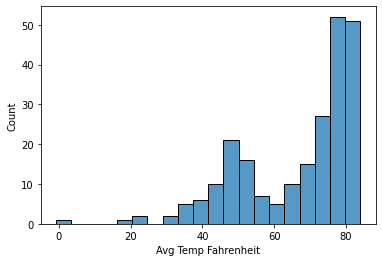

In [197]:
sns.histplot(data=country_temps, bins=20)
plt.show()

Small bimodal curve. Capture the 2 humps in moderate and high climate by cutting in the dips.

/var/folders/j_/38n39dnj4z9gdmy4w2vpg1pr0000gn/T/ipykernel_96548/326786163.py:6: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.xticks([])


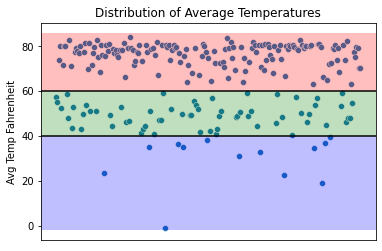

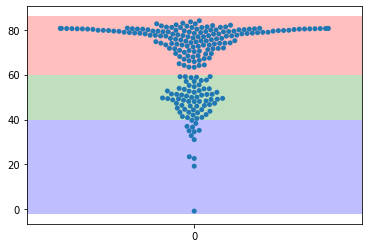

In [198]:
#Scatterplot with potential climate category lines
sns.scatterplot(data=country_temps)
plt.axhline(y = 60, color = 'black', linestyle = '-')
plt.axhline(y = 40, color = 'black', linestyle = '-')
plt.title('Distribution of Average Temperatures')
plt.xticks([])
plt.xlabel('')
plt.axhspan(60, 86, color='red', alpha=0.25, lw=0)
plt.axhspan(40, 60, color='green', alpha=0.25, lw=0)
plt.axhspan(-2, 40, color='blue', alpha=0.25, lw=0)
plt.show()

sns.swarmplot(data=country_temps)
plt.axhspan(60, 86, color='red', alpha=0.25, lw=0)
plt.axhspan(40, 60, color='green', alpha=0.25, lw=0)
plt.axhspan(-2, 40, color='blue', alpha=0.25, lw=0)
plt.show()

Create a categorical bin of 3 climates (cold, moderate, hot) based on the distribution of average temperatures.

In [199]:
climate=pd.DataFrame(country_temps)
climate['Climate']=pd.cut(country_temps,[-200,40,60,300],labels=['Cold','Moderate','Hot'])

In [200]:
climate[climate.index=='United States']

,Avg Temp Fahrenheit,Climate
Country,,
United States,48.105324,Moderate
